![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/component_examples/classifiers/Banking_Queries_Classification.ipynb)


# [DistilBERT Sequence Classification - Industry](https://nlp.johnsnowlabs.com/2021/11/21/distilbert_sequence_classifier_banking77_en.html)

Fine-tuned DistilBERT model by using Banking77 dataset. The dataset is composed of online banking queries annotated with their corresponding intents.

BANKING77 dataset provides a very fine-grained set of intents in a banking domain. It comprises 13,083 customer service queries labeled with 77 intents. It focuses on fine-grained single-domain intent detection.

It can be used to identify and sort help requests which would greatly increase the efficency of workers and also help provide automatic support . 

It can predict the following Entities

`activate_my_card`, `age_limit`, `apple_pay_or_google_pay`, `atm_support`, `automatic_top_up`, `balance_not_updated_after_bank_transfer`, `balance_not_updated_after_cheque_or_cash_deposit`, `beneficiary_not_allowed`, `cancel_transfer`, `card_about_to_expire`, `card_acceptance`, `card_arrival`, `card_delivery_estimate`, `card_linking`, `card_not_working`, `card_payment_fee_charged`, `card_payment_not_recognised`, `card_payment_wrong_exchange_rate`, `card_swallowed`, `cash_withdrawal_charge`, `cash_withdrawal_not_recognised`, `change_pin`, `compromised_card`, `contactless_not_working`, `country_support`, `declined_card_payment`, `declined_cash_withdrawal`, `declined_transfer`, `direct_debit_payment_not_recognised`, `disposable_card_limits`, `edit_personal_details`, `exchange_charge`, `exchange_rate`, `exchange_via_app`, `extra_charge_on_statement`, `failed_transfer`, `fiat_currency_support`, `get_disposable_virtual_card`, `get_physical_card`, `getting_spare_card`, `getting_virtual_card`, `lost_or_stolen_card`, `lost_or_stolen_phone`, `order_physical_card`, `passcode_forgotten`, `pending_card_payment`, `pending_cash_withdrawal`, `pending_top_up`, `pending_transfer`, `pin_blocked`, `receiving_money`, `Refund_not_showing_up`, `request_refund`, `reverted_card_payment?`, `supported_cards_and_currencies`, `terminate_account`, `top_up_by_bank_transfer_charge`, `top_up_by_card_charge`, `top_up_by_cash_or_cheque`, `top_up_failed`, `top_up_limits`, `top_up_reverted`, `topping_up_by_card`, `transaction_charged_twice`, `transfer_fee_charged`, `transfer_into_account`, `transfer_not_received_by_recipient`, `transfer_timing`, `unable_to_verify_identity`, `verify_my_identity`, `verify_source_of_funds`, `verify_top_up`, `virtual_card_not_working`, `visa_or_mastercard`, `why_verify_identity`, `wrong_amount_of_cash_received`, `wrong_exchange_rate_for_cash_withdrawal`



##1.Setup Java 8 and NLU

In [ ]:
!wget https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh -O - | bash

import nlu

--2022-05-19 22:58:41--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1665 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                     0%[                    ]       0  --.-KB/s               Installing  NLU 3.4.4rc1 with  PySpark 3.0.3 and Spark NLP 3.4.3 for Google Colab ...
-                   100%[===================>]   1.63K  --.-KB/s    in 0.001s  

2022-05-19 22:58:41 (1.10 MB/s) - written to stdout [1665/1665]

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit

##2. Load the mdoel and make Sample Predictions 

In [ ]:
pipeline = nlu.load('en.classify.distilbert_sequence.banking77')
pipeline.predict("I am still waiting on my card?",output_level='document')

distilbert_sequence_classifier_banking77 download started this may take some time.
Approximate size to download 235.1 MB
[OK!]


,classified_sequence,classified_sequence_confidence,document
0,card_arrival,0.989413,I am still waiting on my card?


##3.Define Sample Sentences

In [ ]:
sample_sentences = [
"How many countries do you support?",
"I am still waiting on my card?	",
"Can the card be mailed and used in Europe?"
]

##4.Predict on Sample Sentences

In [ ]:
pipeline.predict(sample_sentences)

sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,classified_sequence,classified_sequence_confidence,sentence
0,country_support,0.989771,How many countries do you support?
1,card_arrival,0.989413,I am still waiting on my card?
2,country_support,0.993269,Can the card be mailed and used in Europe?


##5.Take a look at the parmaters of the pipeline

In [ ]:
pipeline.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> component_list['distil_bert_for_sequence_classification'] has settable params:
component_list['distil_bert_for_sequence_classification'].setActivation('softmax')                         | Info: Whether to calcuate logits via Softmax or Sigmoid. Default is Softmax | Currently set to : softmax
component_list['distil_bert_for_sequence_classification'].setBatchSize(8)                                  | Info: Size of every batch | Currently set to : 8
component_list['distil_bert_for_sequence_classification'].setCoalesceSentences(False)                      | Info: Instead of 1 class per sentence (if inputCols is '''sentence''') output 1 class per document by averaging probabilities in all sentences. | Currently set to : False
component_list['distil_bert_for_sequence_classification'].setMaxSentenceLength(512)                        | Info: Max sentence length to process | Currently set to 

Looking Good! Let's test this model on a labelled dataset to see how it performs 

##6.Download Data

we are going to test the model on [this](https://huggingface.co/datasets/banking77) dataset 

Dataset composed of online banking queries annotated with their corresponding intents.

BANKING77 dataset provides a very fine-grained set of intents in a banking domain. It comprises 13,083 customer service queries labeled with 77 intents. It focuses on fine-grained single-domain intent detection.


In [ ]:
!wget http://ckl-it.de/wp-content/uploads/2022/04/Bank_Data.csv

--2022-05-19 22:48:40--  http://ckl-it.de/wp-content/uploads/2022/04/Bank_Data.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1065932 (1.0M) [text/csv]
Saving to: ‘Bank_Data.csv’

Bank_Data.csv       100%[===================>]   1.02M  1.08MB/s    in 0.9s    

2022-05-19 22:48:41 (1.08 MB/s) - ‘Bank_Data.csv’ saved [1065932/1065932]



In [ ]:
import pandas  as pd 
df = pd.read_csv("Bank_Data.csv")
df

,text,label
0,I am still waiting on my card?,card_arrival
1,What can I do if my card still hasn't arrived ...,card_arrival
2,I have been waiting over a week. Is the card s...,card_arrival
3,Can I track my card while it is in the process...,card_arrival
4,"How do I know if I will get my card, or if it ...",card_arrival
...,...,...
13078,"If i'm not in the UK, can I still get a card?",country_support
13079,How many countries do you support?,country_support
13080,What countries do you do business in?,country_support
13081,What are the countries you operate in.,country_support


Let's take  a Peek at the distribution of the labels 

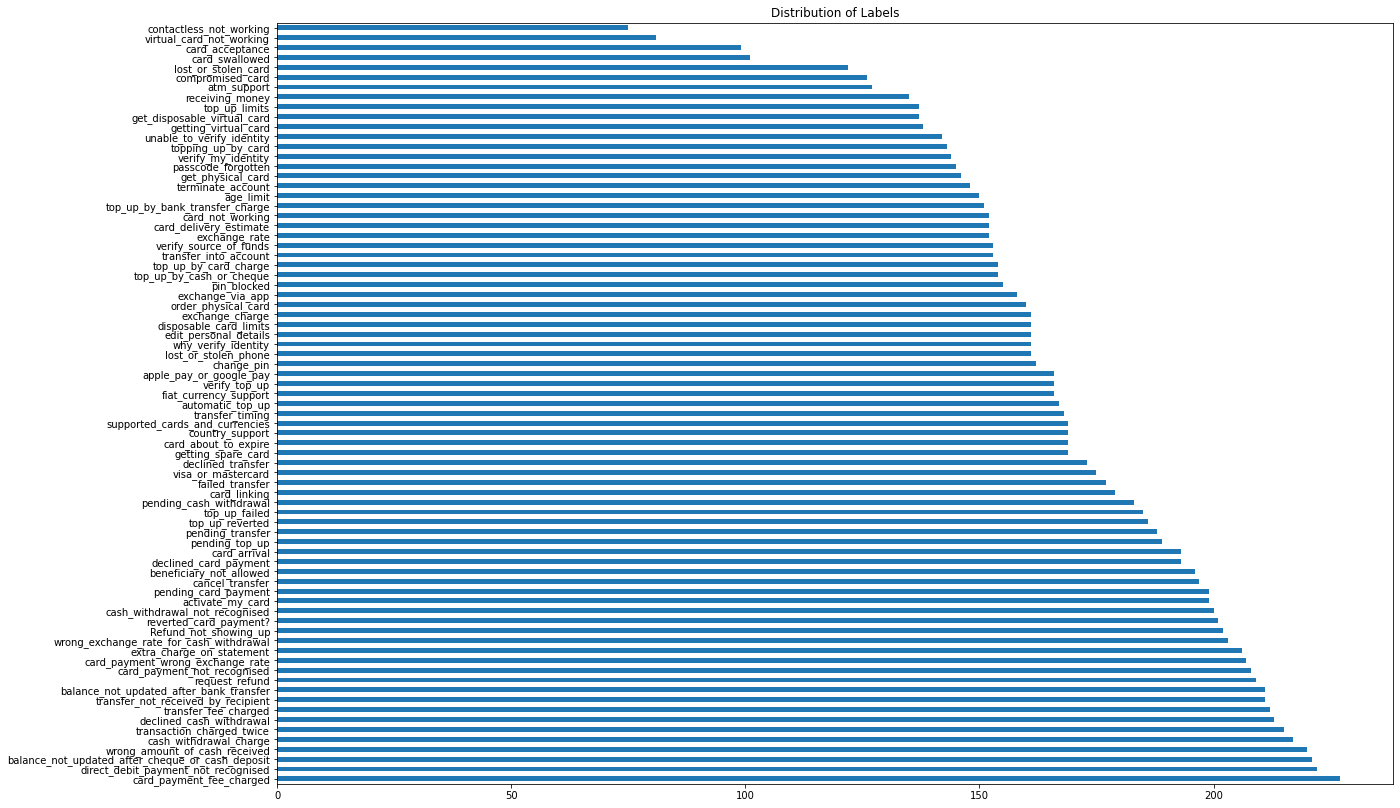

In [ ]:
df.label.value_counts().plot.barh(title='Distribution of Labels', figsize=(20,14))

##7.Make Predictions with the model

In [ ]:
predctions = pipeline.predict(df,output_level = 'document')

In [ ]:
predctions

,classified_sequence,classified_sequence_confidence,document,label,text
0,card_arrival,0.989413,I am still waiting on my card?,card_arrival,I am still waiting on my card?
1,card_arrival,0.989708,What can I do if my card still hasn't arrived ...,card_arrival,What can I do if my card still hasn't arrived ...
2,card_arrival,0.984588,I have been waiting over a week. Is the card s...,card_arrival,I have been waiting over a week. Is the card s...
3,card_arrival,0.980207,Can I track my card while it is in the process...,card_arrival,Can I track my card while it is in the process...
4,card_arrival,0.947395,"How do I know if I will get my card, or if it ...",card_arrival,"How do I know if I will get my card, or if it ..."
...,...,...,...,...,...
13078,country_support,0.99499,"If i'm not in the UK, can I still get a card?",country_support,"If i'm not in the UK, can I still get a card?"
13079,country_support,0.989771,How many countries do you support?,country_support,How many countries do you support?
13080,country_support,0.994252,What countries do you do business in?,country_support,What countries do you do business in?
13081,country_support,0.994301,What are the countries you operate in.,country_support,What are the countries you operate in.


##8.Evaluate Predictions 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predctions['label'], predctions['classified_sequence']) )

                                                  precision    recall  f1-score   support

                           Refund_not_showing_up       1.00      1.00      1.00       202
                                activate_my_card       1.00      0.99      1.00       199
                                       age_limit       1.00      1.00      1.00       150
                         apple_pay_or_google_pay       0.99      1.00      1.00       166
                                     atm_support       0.95      1.00      0.97       127
                                automatic_top_up       1.00      0.98      0.99       167
         balance_not_updated_after_bank_transfer       0.95      0.96      0.96       211
balance_not_updated_after_cheque_or_cash_deposit       1.00      0.99      0.99       221
                         beneficiary_not_allowed       0.97      0.98      0.97       196
                                 cancel_transfer       0.98      0.99      0.99       197
         

# There are many more models you can put to use in 1 line of code!
## Checkout [the Modelshub](https://nlp.johnsnowlabs.com/models) and the [NLU Namespace](https://nlu.johnsnowlabs.com/docs/en/spellbook) for more models

### NLU Webinars and Video Tutorials
- [NLU & Streamlit Tutorial](https://vimeo.com/579508034#)
- [Crash course of the 50 + Medical Domains and the 200+ Healtchare models in NLU](https://www.youtube.com/watch?v=gGDsZXt1SF8)
- [Multi Lingual NLU Webinar - Tutorial on Chinese News dataset](https://www.youtube.com/watch?v=ftAOqJuxnV4)
- [John Snow Labs NLU: Become a Data Science Superhero with One Line of Python code](https://events.johnsnowlabs.com/john-snow-labs-nlu-become-a-data-science-superhero-with-one-line-of-python-code?hsCtaTracking=c659363c-2188-4c86-945f-5cfb7b42fcfc%7C8b2b188b-92a3-48ba-ad7e-073b384425b0)
- [Python Web Def Conf - Python's NLU library: 1,000+ Models, 200+ Languages, State of the Art Accuracy, 1 Line of Code](https://2021.pythonwebconf.com/presentations/john-snow-labs-nlu-the-simplicity-of-python-the-power-of-spark-nlp)
- [NYC/DC NLP Meetup with NLU](https://youtu.be/hJR9m3NYnwk?t=2155)

### More ressources 
- [Join our Slack](https://join.slack.com/t/spark-nlp/shared_invite/zt-lutct9gm-kuUazcyFKhuGY3_0AMkxqA)
- [NLU Website](https://nlu.johnsnowlabs.com/)
- [NLU Github](https://github.com/JohnSnowLabs/nlu)
- [Many more NLU example tutorials](https://github.com/JohnSnowLabs/nlu/tree/master/examples)
- [Overview of every powerful nlu 1-liner](https://nlu.johnsnowlabs.com/docs/en/examples)
- [Checkout the Modelshub for an overview of all models](https://nlp.johnsnowlabs.com/models) 
- [Checkout the NLU Namespace where you can find every model as a tabel](https://nlu.johnsnowlabs.com/docs/en/spellbook)
- [Intro to NLU article](https://medium.com/spark-nlp/1-line-of-code-350-nlp-models-with-john-snow-labs-nlu-in-python-2f1c55bba619)
- [Indepth and easy Sentence Similarity Tutorial, with StackOverflow Questions using BERTology embeddings](https://medium.com/spark-nlp/easy-sentence-similarity-with-bert-sentence-embeddings-using-john-snow-labs-nlu-ea078deb6ebf)
- [1 line of Python code for BERT, ALBERT, ELMO, ELECTRA, XLNET, GLOVE, Part of Speech with NLU and t-SNE](https://medium.com/spark-nlp/1-line-of-code-for-bert-albert-elmo-electra-xlnet-glove-part-of-speech-with-nlu-and-t-sne-9ebcd5379cd)